In [2]:
from space import Space
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import scipy.integrate as integrate
import seaborn as sns


In [3]:
Np = 1000
num_bins = 20

simulation = Space(Np=Np,dt=0.5)
num_steps = 3000

while num_steps >= simulation.current_step:
    simulation.mainloop()


In [4]:
for particle in simulation.particles:
    particle.previous_position = np.array(particle.previous_position)

In [5]:
# dispersões = []

# for i in range(num_steps):
#     posições = []
#     for particle in simulation.particles:
#         posições.append(particle.previous_position[i])
#     posições = np.array(posições)
#     dispersões.append(np.array([np.std(posições[0:,0]),np.std(posições[0:,1])]))
# dispersões = np.array(dispersões)
# print(dispersões)

In [6]:
distancias = []

for particle in simulation.particles:
    distancias.append(particle.position)
distancias = np.array(distancias)

In [7]:
#Para estabelecer o ylim e o xlim
distanciasx = np.array([])
distanciasy = np.array([])

for particle in simulation.particles:
    distanciasx = np.hstack((distanciasx,particle.position[0]))
    distanciasy = np.hstack((distanciasy,particle.position[1]))

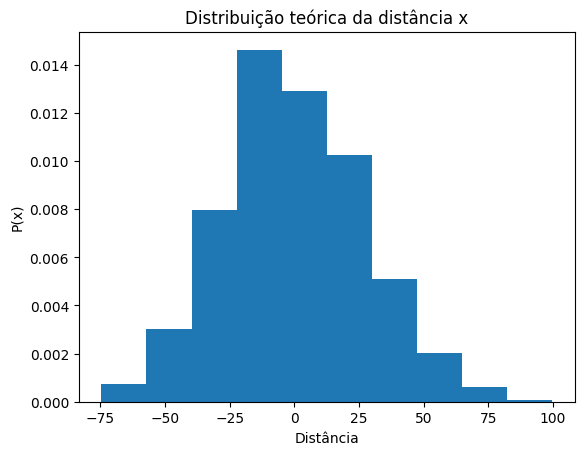

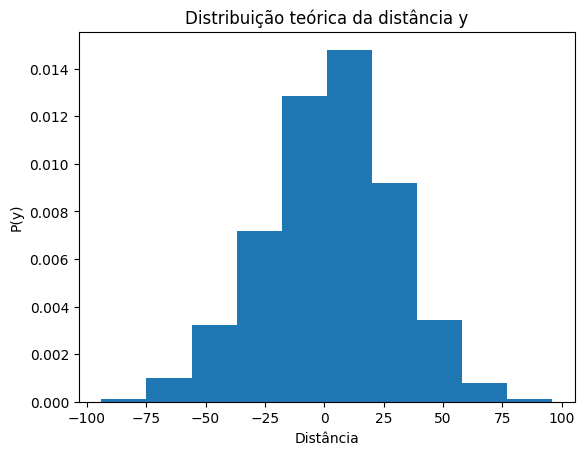

In [8]:
distribuiçãox = rnd.normal(np.mean(distanciasx),np.std(distanciasx),Np)
plt.title('Distribuição teórica da distância x')
plt.ylabel('P(x)')
plt.xlabel('Distância')
plt.hist(distribuiçãox,density=True)
plt.show()
plt.close()

distribuiçãoy = rnd.normal(np.mean(distanciasy),np.std(distanciasy),Np)
plt.title('Distribuição teórica da distância y')
plt.ylabel('P(y)')
plt.xlabel('Distância')
plt.hist(distribuiçãoy,density=True)
plt.show()
plt.close()

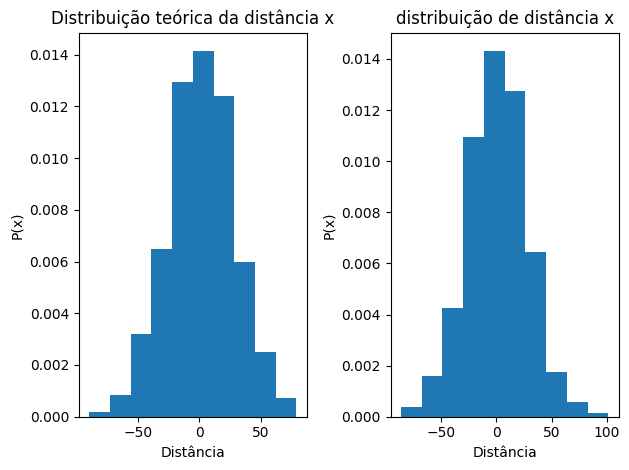

In [9]:
distribuiçãox = rnd.normal(np.mean(distanciasx),np.std(distanciasx),Np)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.set_title('Distribuição teórica da distância x')
ax1.set_ylabel('P(x)')
ax1.set_xlabel('Distância')
ax2.set_title('distribuição de distância x')
ax2.set_ylabel('P(x)')
ax2.set_xlabel('Distância')

ax1.hist(distribuiçãox,density=True)
ax2.hist(distanciasx,density=True)

fig.tight_layout()
plt.show()

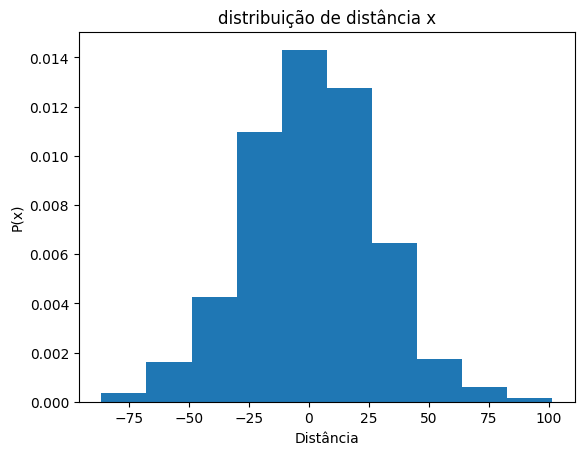

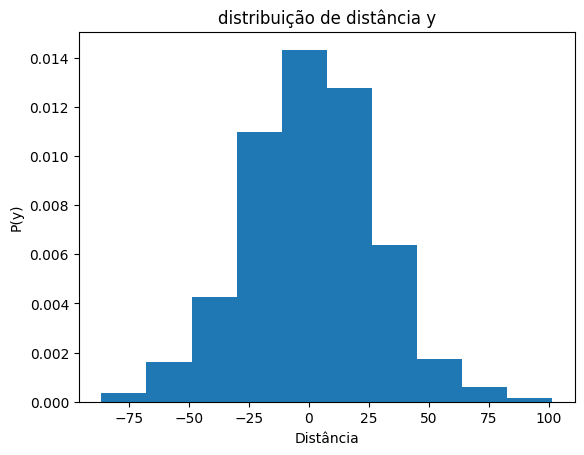

In [10]:
plt.title('distribuição de distância x')
plt.ylabel('P(x)')
plt.xlabel('Distância')
plt.hist(distancias[0:,0],density=True)
plt.show()
plt.close()

plt.title('distribuição de distância y')
plt.ylabel('P(y)')
plt.xlabel('Distância')
plt.hist(distancias[1:,0],density=True)
plt.show()
plt.close()

Distribuição Gaussiana das distancias x e y

In [11]:
#calculo de area usando integral numérica
n = 5
limite_inferior = np.min(distribuiçãox)
limite_superior = 0

integrando_gauss = distribuiçãox[(distribuiçãox >= limite_inferior) & (distribuiçãox <= limite_superior)]
integral_gauss = integrate.simpson(np.abs(integrando_gauss)) / integrate.simpson(np.abs(distribuiçãox))

integrando_dados = distanciasx[(distanciasx >= limite_inferior) & (distanciasx <= limite_superior)]
integral_dados = integrate.simpson(np.abs(integrando_dados)) / integrate.simpson(np.abs(distanciasx))

print(f'Integral numerica da gaussiana no intervalo {limite_inferior} até {limite_superior}: {integral_gauss}')
print(f'Integral dos dados da simulação no intervalo {limite_inferior} até {limite_superior}: {integral_dados}')
print(f'Erro percentual {np.abs(integral_gauss - integral_dados)/integral_dados * 100}')

Integral numerica da gaussiana no intervalo -89.36202197799163 até 0: 0.4640147294230501
Integral dos dados da simulação no intervalo -89.36202197799163 até 0: 0.47748876407732854
Erro percentual 2.821853762426195


In [12]:
n = 5
limite_inferior = np.min(distribuiçãoy)
limite_superior = 0

integrando_gauss = distribuiçãox[(distribuiçãoy >= limite_inferior) & (distribuiçãoy <= limite_superior)]
integral_gauss = integrate.simpson(np.abs(integrando_gauss)) / integrate.simpson(np.abs(distribuiçãoy))

integrando_dados = distanciasx[(distanciasy >= limite_inferior) & (distanciasy <= limite_superior)]
integral_dados = integrate.simpson(np.abs(integrando_dados)) / integrate.simpson(np.abs(distanciasy))

print(f'Integral numerica da gaussiana no intervalo {limite_inferior} até {limite_superior}: {integral_gauss}')
print(f'Integral dos dados da simulação no intervalo {limite_inferior} até {limite_superior}: {integral_dados}')
print(f'Erro percentual {np.abs(integral_gauss - integral_dados)/integral_dados * 100}')

Integral numerica da gaussiana no intervalo -93.91352532063638 até 0: 0.4537182908174198
Integral dos dados da simulação no intervalo -93.91352532063638 até 0: 0.47520516698245674
Erro percentual 4.521599860009551


In [13]:
modulo_distancia = np.sqrt(distanciasx**2 + distanciasy**2)
print(modulo_distancia)
np.mean(modulo_distancia)

[ 33.30540497  25.59785147  40.69705149  13.23820229  38.02959374
  89.05195113  12.97112177  33.76758801  21.05350327   4.71699057
  25.77304794  19.52562419  12.5         43.00290688  25.04495957
  29.00431002  27.5         42.99127819  20.57304061  22.41093483
  18.17278185  42.95637322  73.91380115  55.8323383   30.10398645
  40.37635447  36.78654645  12.17579566  45.83939354  15.30522787
  32.88236609   5.40832691  58.25160942  21.80022936  25.04495957
  32.23740064  51.54852083  60.38418667  27.77138815  31.34086789
  86.26268023  43.30415684  31.10064308  54.27936993  27.60887538
   7.15891053  30.10398645   7.5         24.3977458   42.02677718
  18.0346888   21.70829335  41.48795006  38.93905494   5.40832691
  22.5         23.11384866  37.40655023  14.08012784   9.70824392
  23.69071548  43.52298243  40.74616546  56.50884886  36.21118612
  41.80011962  22.94013949  39.53795645  28.42973795  29.29590415
  23.94263979  34.94638751  61.28009465  16.10124219  39.70201506
  22.67708

33.946062724523

(array([0.00534112, 0.00969314, 0.01523208, 0.02116666, 0.02690342,
        0.02314485, 0.01938629, 0.02077102, 0.01345171, 0.01147352,
        0.00850623, 0.00830841, 0.00474766, 0.00276947, 0.00356075,
        0.00158255, 0.0009891 , 0.00019782, 0.00019782, 0.00039564]),
 array([  1.5       ,   6.55511939,  11.61023879,  16.66535818,
         21.72047758,  26.77559697,  31.83071637,  36.88583576,
         41.94095515,  46.99607455,  52.05119394,  57.10631334,
         62.16143273,  67.21655213,  72.27167152,  77.32679091,
         82.38191031,  87.4370297 ,  92.4921491 ,  97.54726849,
        102.60238789]),
 <BarContainer object of 20 artists>)

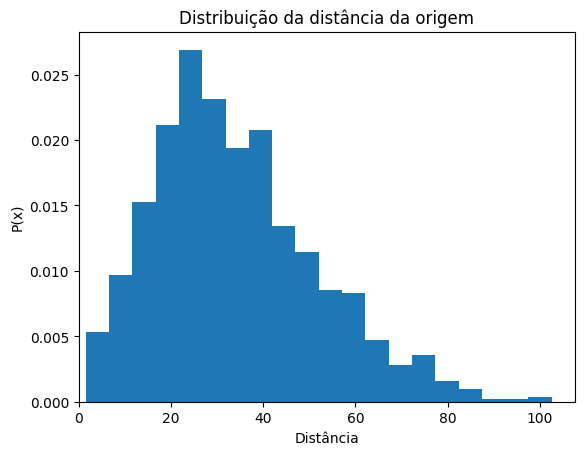

In [14]:
xlim = np.max(modulo_distancia) + 5
plt.title('Distribuição da distância da origem')
plt.ylabel('P(x)')
plt.xlabel('Distância')
plt.xlim(right=xlim)
plt.hist(modulo_distancia,density=True,bins = num_bins)

(array([0.00480473, 0.01103309, 0.02135437, 0.02046461, 0.02295595,
        0.02206619, 0.02028665, 0.01459215, 0.01210081, 0.00854175,
        0.00694017, 0.00462678, 0.00409292, 0.00231339, 0.00053386,
        0.00071181, 0.00035591, 0.        , 0.        , 0.00017795]),
 array([  1.14454835,   6.76400625,  12.38346414,  18.00292203,
         23.62237992,  29.24183781,  34.8612957 ,  40.4807536 ,
         46.10021149,  51.71966938,  57.33912727,  62.95858516,
         68.57804306,  74.19750095,  79.81695884,  85.43641673,
         91.05587462,  96.67533251, 102.29479041, 107.9142483 ,
        113.53370619]),
 <BarContainer object of 20 artists>)

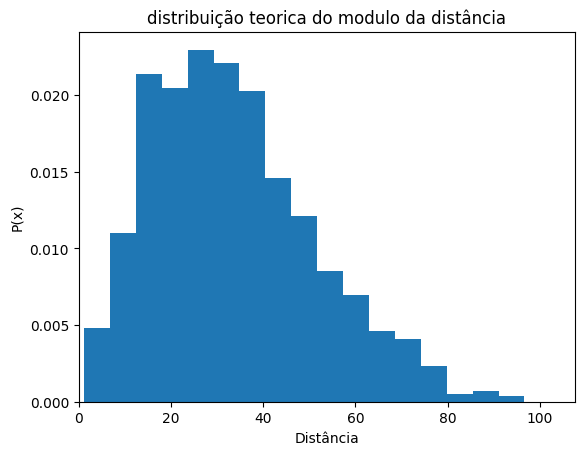

In [15]:
distribuição = np.sqrt(distribuiçãox**2 + distribuiçãoy**2)
plt.title('distribuição teorica do modulo da distância')
plt.ylabel('P(x)')
plt.xlabel('Distância')
plt.xlim(right=xlim)
plt.hist(distribuição,density=True,bins=num_bins)

In [16]:
# #calculo de area usando integral numérica
# n = 10
# limite_inferior = 40
# limite_superior = np.max(distribuição)

# integrando_gauss = distribuição[(distribuição >= limite_inferior) & (distribuição <= limite_superior)]
# integral_gauss = integrate.simpson(np.abs(integrando_gauss)) / integrate.simpson(np.abs(distribuição))
# integrando_dados = modulo_distancia[(modulo_distancia >= limite_inferior) & (modulo_distancia <= limite_superior)]
# integral_dados = integrate.simpson(np.abs(integrando_dados))/integrate.simpson(np.abs(modulo_distancia))
# print(f'Integral numerica da gaussiana no intervalo {limite_inferior} até {limite_superior}: {integral_gauss}')

# print(f'Integral dos dados da simulação no intervalo {limite_inferior} até {limite_superior}: {integral_dados}')

# print(f'Erro percentual {np.abs(integral_gauss - integral_dados)/integral_dados * 100}')

C:\Users\micka\AppData\Local\Temp\ipykernel_5384\162350236.py:12: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  a = sns.kdeplot(x=posições_agora[0:,0],y=posições_agora[0:,1],cmap=cmap,fill=True,levels=20,thresh=0,cut=10)


AttributeError: 'AxesSubplot' object has no attribute 'limit'

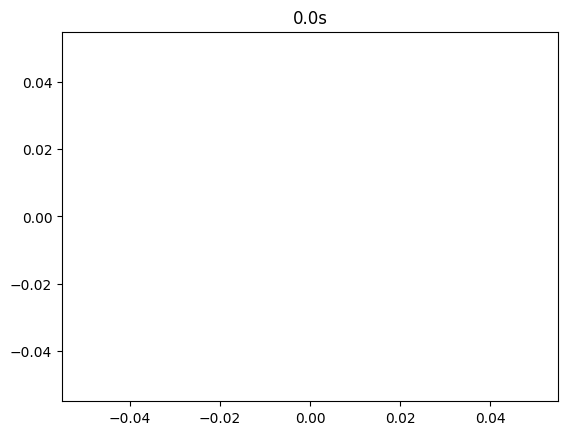

In [18]:
margem_extra = 5
cmap = sns.light_palette("blue", as_cmap=True)
for i in range(len(simulation.steps)):

    if i % 500 == 0:
        posições_agora = []
        plt.title(f'{i*0.5}s')
        for particle in simulation.particles:
            #plt.scatter(particle.previous_position[i,0],particle.previous_position[i,1])
            posições_agora.append(particle.previous_position[i])
        posições_agora = np.array(posições_agora)
        a = sns.kdeplot(x=posições_agora[0:,0],y=posições_agora[0:,1],cmap=cmap,fill=True,levels=20,thresh=0,cut=10)
        a.limit(x=(np.amin(distanciasx-margem_extra)), y= (np.amin(distanciasy-margem_extra),np.amax(distanciasy+margem_extra)))
        #print(f'Matriz da posição no instante  {posições_agora}')
        #print('')
        print(f'desvio padrão no eixo x {np.std(posições_agora[0:,0])}') # escrever separadamente num outro bloco
        print(f'desvio padrão no eixo y {np.std(posições_agora[0:,1])}')
        print('')
        print(f'média no eixo x: {np.mean(posições_agora[0:,0])}')
        print(f'média no eixo y: {np.mean(posições_agora[0:,1])}')
        print('')
        print(f'Variância no eixo x {np.std(posições_agora[0:,0])**2}')
        print(f'Variância no eixo y {np.std(posições_agora[0:,1])**2}')
        # plt.ylim(np.amin(distanciasy-margem_extra),np.amax(distanciasy+margem_extra))
        # plt.xlim(np.amin(distanciasx-margem_extra),np.amax(distanciasx+margem_extra))
        plt.axis('off')
        plt.show()
        plt.close()

In [ ]:
#Grafico das posições finais
position = []

for particle in simulation.particles:
    position.append(particle.position)
position = np.array(position)

<AxesSubplot:>

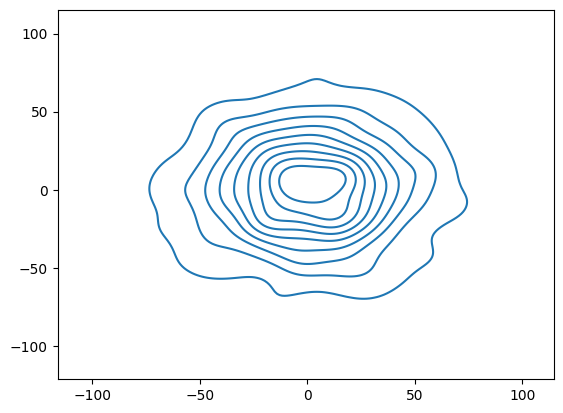

In [ ]:
sns.kdeplot(x=position[0:,0],y=position[0:,1])

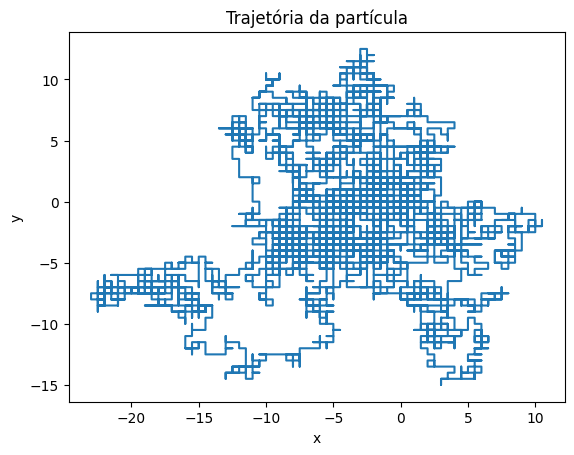

In [ ]:
plt.title('Trajetória da partícula')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(simulation.particles[0].previous_position[0:,0],simulation.particles[0].previous_position[0:,1])

In [ ]:
# plt.title('Trajetória da partícula (componente x) vs numero de passos')
# plt.xlabel('Número de passos')
# plt.ylabel('trajetória x')
# plt.plot(simulation.steps,simulation.particles[0].previous_position[0:,0])

In [ ]:
# plt.title('Trajetória da partícula (componente y) vs numero de passos')
# plt.xlabel('Número de passos')
# plt.ylabel('trajetória y')
# plt.plot(simulation.steps,simulation.particles[0].previous_position[0:,1])

In [ ]:
#posição final das particulas para pegar o desvio padrão e a média

posições_finais = []

for particle in simulation.particles:
    posições_finais.append(particle.position)
posições_finais = np.array(posições_finais)

# np.std(posições_finais,axis=0) #desvio no eixo x
print(f'Desvio padrão eixo x: {np.std(posições_finais[0:,0])}')
print(f'Desvio padrão eixo y: {np.std(posições_finais[0:,1])}')

print(f'Média eixo x: {np.mean(posições_finais[0:,0])}')
print(f'Média eixo y: {np.mean(posições_finais[0:,1])}')

print(f'Variancia do eixo x {np.std(posições_finais[0:,0])**2}')
print(f'Variancia do eixo y {np.std(posições_finais[0:,1])**2}')

Desvio padrão eixo x: 27.588763106562062
Desvio padrão eixo y: 27.157574334796543
Média eixo x: 0.9005
Média eixo y: 0.0375
Variancia do eixo x 761.1398497499999
Variancia do eixo y 737.5338437499998


In [ ]:
difusãox = np.mean(distanciasx**2)/(2 * num_steps)
difusãoy = np.mean(distanciasy**2)/(2 * num_steps)
difusão = np.sqrt(difusãox**2 + difusãoy**2)
print(difusão)

região_por_difusão_x = np.sqrt(2*difusãox * num_steps)
região_por_difusão_y = np.sqrt(2*difusãoy * num_steps)

print(f'valor da difusão x {difusãox}')
print(f'valor da difusão y {difusãoy}')
print(f'root mean square {np.sqrt(np.mean(distanciasy**2))}')
print(f'tamanho da região de difusão x {região_por_difusão_x}')
print(f'tamanho da região de difusão y {região_por_difusão_y}')
print(f'valor encontrado pelos dados {np.std(distanciasy)}')

print(f'erro percentual {np.abs(região_por_difusão_y-np.std(distanciasy))/np.std(distanciasy) * 100}')

0.17673954396371933
valor da difusão x 0.12699179166666666
valor da difusão y 0.12292254166666668
root mean square 27.15760022535128
tamanho da região de difusão x 27.603455399641547
tamanho da região de difusão y 27.15760022535128
valor encontrado pelos dados 27.157574334796543
erro percentual 9.533456272332136e-05
